In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1. Data Preparation

In [20]:
df=pd.read_csv('train.csv')
print(df.shape)

(42000, 785)


In [21]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [22]:
df.head(n=5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
data=df.values
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [24]:
X=data[:,1:]
Y=data[:,0]
print(X.shape)
print(Y.shape)

(42000, 784)
(42000,)


In [25]:
split=int(0.8*X.shape[0])
print(split)
X_train=X[:split,:]
Y_train=Y[:split]
X_test=X[split:,:]
Y_test=Y[split:]
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

33600
(33600, 784) (33600,)
(8400, 784) (8400,)


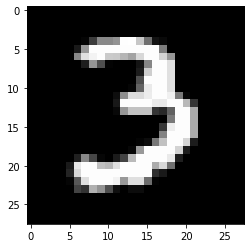

3


In [28]:
#visualize some points
def drawImg(sample):
    img=sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()

drawImg(X_train[9])
print(Y_train[9])
    

# Step 2.KNN

In [33]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def KNN(X,Y,queryPoint,k=5):
    vals=[]
    m=X.shape[0]
    for i in range(m):
        d=dist(queryPoint,X[i])
        vals.append((d,Y[i]))
    
    vals=sorted(vals)
    vals=vals[:k]
    vals=np.array(vals)
    #print(vals)
    new_vals=np.unique(vals[:,1],return_counts=True)
     #new_vals is tuple
    print(new_vals)
    index=new_vals[1].argmax()
    pred=new_vals[0][index]
    return pred

# Step 3.Make Predictions

In [38]:
pred=KNN(X_train,Y_train,X_test[3])
print(int(pred))


(array([2.]), array([5]))
2


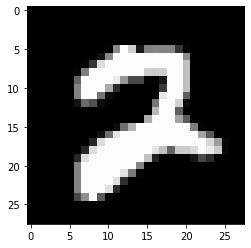

2


In [37]:
drawImg(X_test[3])
print(Y_test[3])